In [213]:
import pandas as pd
from random import randint, choice, sample
from scipy.stats import binom
from numpy.random import choice
import numpy as np
from time import time as time_
from tqdm.notebook import tqdm
from copy import deepcopy

In [214]:
fishs = ['щука', 'судак', 'окунь', 'берш', 'речная форель', 'озерная форель', 'елец', 'чехонь', 'сом', 'голавль', 'язь',
         'карп', 'жерех', 'лещ', 'карась', 'линь', 'пескарь', 'ротан', 'плотва', 'красноперка', 'налим', 'густера',
         'амур', 'ерш', 'сазан', 'подуст', 'толстолобик', 'вобла', 'хариус']
fishs = list(map(lambda x: x.capitalize(), fishs))

In [215]:
train_dt = pd.read_csv('train_dt.csv', sep=';')
train_dt['forecast'] = train_dt['forecast'] * 1.5

In [216]:
test_dt = train_dt[:10000]

In [217]:
def month_(row):
    for i in range(1,13):
        if row['month_{}'.format(i)] == 1:
            return i
t = train_dt[train_dt['Щука'] == 1]
t['month'] = t.apply(month_, axis=1)
t[t['Щука'] == 1][['month', 'day', 'forecast']].groupby(['month', 'day']).mean().unstack()

C:\Users\Xiaomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


forecast                                                              \
day          1         2         3         4         5         6         7    
month                                                                         
1      0.408640  0.530515  0.487500  0.487500  0.526930  0.569945  0.548437   
2      0.833410  0.842371  0.842371  0.743796  0.698989  0.824449  0.573529   
3      1.216958  1.154228  1.078952  0.928401  1.091498  0.890763  0.991131   
4      0.435524  0.408640  0.338741  0.274219  0.376379  0.403263  0.349494   
5      1.016222  0.928401  0.890763  1.016222  0.715119  0.915855  1.141682   
6      0.623713  0.978585  0.709743  0.817279  0.871048  0.946324  0.967831   
7      0.654182  0.752757  0.833410  0.797564  0.761719  0.931985  0.842371   
8      0.893750  0.814890  0.512592  0.512592  0.473162  0.657169  0.828033   
9      1.056250  1.227114  0.823254  0.807721  0.963051  1.164982  1.133915   
10     1.166176  1.414706  1.644118  1.261765  0.630882  1.070588  1.300000   
11     1.380055  1.272518  1.093290  1.039522  1.003676  0.985754  1.397978   
12     0.931985  1.046691  0.960662  0.931985  0.903309  1.104044  1.046691   

                                     ...                                \
day          8         9         10  ...        22        23        24   
month                                ...                                 
1      0.532307  0.548437  0.575322  ...  0.609375  0.623713  0.595037   
2      0.806526  0.806526  0.618336  ...  0.892555  0.742004  0.828033   
3      1.028768  0.953493  1.267142  ...  0.946324  0.774265  0.860294   
4      0.349494  0.365625  0.349494  ...  1.061029  1.161397  1.003676   
5      0.765303  0.702574  0.878217  ...  1.041314  1.003676  1.267142   
6      0.806526  0.731250  0.924816  ...  0.537684  0.681066  0.672105   
7      0.645221  0.681066  0.788603  ...  0.492877  0.884191  0.848346   
8      0.683456  0.538879  0.696599  ...  1.104044  0.831618  1.018015   
9      1.087316  1.164982  1.009651  ...  0.770680  1.093290  1.218750   
10     0.975000  0.955882  1.223529  ...  1.053860  0.953493  0.802941   
11     1.218750  0.878217  0.931985  ...  1.254596  1.147059  1.469669   
12     0.759926  0.688235  0.831618  ...  0.884191  0.800551  0.764706   

                                                                             
day          25        26        27        28        29        30        31  
month                                                                        
1      0.587868  0.602206  0.652390  0.480331  0.408640  0.652390  0.695404  
2      1.032353  0.871048  0.903309  0.612960  1.010846       NaN       NaN  
3      1.204412  1.376471  1.247426  1.304779  1.190074  1.562868  1.132721  
4      0.659559  1.061029  1.147059  1.089706  1.218750  0.931985       NaN  
5      1.204412  0.828033  0.577114  0.991131  1.066406  1.166774  0.940947  
6      0.725873  0.761719  0.564568  0.618336  0.734835  0.734835       NaN  
7      0.979779  0.800551  0.716912  0.764706  0.800551  0.633272  0.872243  
8      1.075368  0.759926  0.917647  0.501838  0.630882  1.089706  0.903309  
9      0.878217  0.716912  0.842371  0.985754  1.147059  0.914063       NaN  
10     0.970221  1.187684  1.271324  0.652390  0.736029  0.936765  0.853125  
11     1.326287  1.290441  1.451746  1.218750  0.931985  1.057445       NaN  
12     0.561581  0.633272  0.693015  0.740809  0.728860  0.669118  0.621324  

[12 rows x 31 columns]

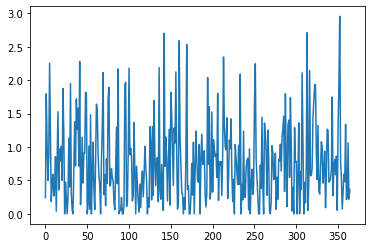

In [218]:
y[:365].plot()

In [219]:
train_dt = train_dt.sample(frac=0.3).reset_index(drop=True)

In [220]:
y = train_dt['forecast']
del train_dt['forecast']

In [221]:
y.std()

0.4795830451402078

In [222]:
X = train_dt.values

In [223]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [224]:
X_train.shape

(72161, 655)

In [225]:
X_test.shape

(18041, 655)

In [226]:
y.describe()

count    90202.000000
mean         0.622055
std          0.479583
min          0.000000
25%          0.235248
50%          0.545114
75%          0.914062
max          2.925000
Name: forecast, dtype: float64

In [227]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

model = CatBoostRegressor()

In [228]:
model.fit(X_train, y_train)

Learning rate set to 0.083595
0:	learn: 0.4655490	total: 51ms	remaining: 51s
1:	learn: 0.4519575	total: 109ms	remaining: 54.5s
2:	learn: 0.4399096	total: 163ms	remaining: 54s
3:	learn: 0.4292720	total: 216ms	remaining: 53.8s
4:	learn: 0.4200700	total: 277ms	remaining: 55.1s
5:	learn: 0.4118678	total: 339ms	remaining: 56.2s
6:	learn: 0.4034445	total: 425ms	remaining: 1m
7:	learn: 0.3967083	total: 482ms	remaining: 59.7s
8:	learn: 0.3902505	total: 527ms	remaining: 58.1s
9:	learn: 0.3844184	total: 567ms	remaining: 56.1s
10:	learn: 0.3791135	total: 613ms	remaining: 55.1s
11:	learn: 0.3741557	total: 682ms	remaining: 56.1s
12:	learn: 0.3698363	total: 731ms	remaining: 55.5s
13:	learn: 0.3656780	total: 780ms	remaining: 54.9s
14:	learn: 0.3615613	total: 835ms	remaining: 54.9s
15:	learn: 0.3580223	total: 878ms	remaining: 54s
16:	learn: 0.3547542	total: 931ms	remaining: 53.8s
17:	learn: 0.3514471	total: 990ms	remaining: 54s
18:	learn: 0.3486699	total: 1.04s	remaining: 53.7s
19:	learn: 0.3460550	to

163:	learn: 0.2413886	total: 8.16s	remaining: 41.6s
164:	learn: 0.2411018	total: 8.21s	remaining: 41.5s
165:	learn: 0.2405944	total: 8.26s	remaining: 41.5s
166:	learn: 0.2403127	total: 8.29s	remaining: 41.4s
167:	learn: 0.2400795	total: 8.34s	remaining: 41.3s
168:	learn: 0.2395461	total: 8.38s	remaining: 41.2s
169:	learn: 0.2393342	total: 8.43s	remaining: 41.1s
170:	learn: 0.2390985	total: 8.47s	remaining: 41.1s
171:	learn: 0.2388503	total: 8.51s	remaining: 41s
172:	learn: 0.2384137	total: 8.56s	remaining: 40.9s
173:	learn: 0.2381751	total: 8.6s	remaining: 40.8s
174:	learn: 0.2378905	total: 8.65s	remaining: 40.8s
175:	learn: 0.2376302	total: 8.69s	remaining: 40.7s
176:	learn: 0.2373764	total: 8.74s	remaining: 40.7s
177:	learn: 0.2371053	total: 8.79s	remaining: 40.6s
178:	learn: 0.2368098	total: 8.84s	remaining: 40.6s
179:	learn: 0.2366197	total: 8.9s	remaining: 40.5s
180:	learn: 0.2362511	total: 8.96s	remaining: 40.5s
181:	learn: 0.2358178	total: 9.01s	remaining: 40.5s
182:	learn: 0.23

323:	learn: 0.2104837	total: 15.7s	remaining: 32.9s
324:	learn: 0.2103780	total: 15.8s	remaining: 32.8s
325:	learn: 0.2103007	total: 15.8s	remaining: 32.8s
326:	learn: 0.2102157	total: 15.9s	remaining: 32.7s
327:	learn: 0.2101107	total: 15.9s	remaining: 32.7s
328:	learn: 0.2099968	total: 16s	remaining: 32.6s
329:	learn: 0.2098612	total: 16s	remaining: 32.6s
330:	learn: 0.2097527	total: 16.1s	remaining: 32.5s
331:	learn: 0.2096277	total: 16.2s	remaining: 32.5s
332:	learn: 0.2095117	total: 16.2s	remaining: 32.4s
333:	learn: 0.2093507	total: 16.3s	remaining: 32.4s
334:	learn: 0.2092216	total: 16.3s	remaining: 32.4s
335:	learn: 0.2090469	total: 16.3s	remaining: 32.3s
336:	learn: 0.2089533	total: 16.4s	remaining: 32.2s
337:	learn: 0.2088587	total: 16.4s	remaining: 32.2s
338:	learn: 0.2087878	total: 16.5s	remaining: 32.1s
339:	learn: 0.2086928	total: 16.5s	remaining: 32s
340:	learn: 0.2086085	total: 16.6s	remaining: 32s
341:	learn: 0.2084384	total: 16.6s	remaining: 31.9s
342:	learn: 0.208342

485:	learn: 0.1941881	total: 23.3s	remaining: 24.6s
486:	learn: 0.1941601	total: 23.3s	remaining: 24.5s
487:	learn: 0.1940968	total: 23.3s	remaining: 24.5s
488:	learn: 0.1940321	total: 23.4s	remaining: 24.4s
489:	learn: 0.1939760	total: 23.4s	remaining: 24.4s
490:	learn: 0.1939170	total: 23.5s	remaining: 24.3s
491:	learn: 0.1938380	total: 23.5s	remaining: 24.3s
492:	learn: 0.1936398	total: 23.6s	remaining: 24.2s
493:	learn: 0.1935694	total: 23.6s	remaining: 24.2s
494:	learn: 0.1935141	total: 23.6s	remaining: 24.1s
495:	learn: 0.1934429	total: 23.7s	remaining: 24.1s
496:	learn: 0.1933860	total: 23.7s	remaining: 24s
497:	learn: 0.1933521	total: 23.8s	remaining: 24s
498:	learn: 0.1932880	total: 23.8s	remaining: 23.9s
499:	learn: 0.1932088	total: 23.9s	remaining: 23.9s
500:	learn: 0.1931620	total: 23.9s	remaining: 23.8s
501:	learn: 0.1931034	total: 24s	remaining: 23.8s
502:	learn: 0.1930532	total: 24s	remaining: 23.7s
503:	learn: 0.1929956	total: 24.1s	remaining: 23.7s
504:	learn: 0.192907

647:	learn: 0.1832347	total: 30.6s	remaining: 16.6s
648:	learn: 0.1831583	total: 30.7s	remaining: 16.6s
649:	learn: 0.1831303	total: 30.7s	remaining: 16.5s
650:	learn: 0.1830636	total: 30.8s	remaining: 16.5s
651:	learn: 0.1829804	total: 30.8s	remaining: 16.5s
652:	learn: 0.1829357	total: 30.9s	remaining: 16.4s
653:	learn: 0.1828493	total: 30.9s	remaining: 16.4s
654:	learn: 0.1827998	total: 31s	remaining: 16.3s
655:	learn: 0.1827093	total: 31s	remaining: 16.3s
656:	learn: 0.1826513	total: 31.1s	remaining: 16.2s
657:	learn: 0.1825641	total: 31.1s	remaining: 16.2s
658:	learn: 0.1825047	total: 31.2s	remaining: 16.1s
659:	learn: 0.1824363	total: 31.2s	remaining: 16.1s
660:	learn: 0.1823877	total: 31.3s	remaining: 16s
661:	learn: 0.1823359	total: 31.3s	remaining: 16s
662:	learn: 0.1822765	total: 31.4s	remaining: 15.9s
663:	learn: 0.1822059	total: 31.4s	remaining: 15.9s
664:	learn: 0.1821541	total: 31.4s	remaining: 15.8s
665:	learn: 0.1821231	total: 31.5s	remaining: 15.8s
666:	learn: 0.182050

808:	learn: 0.1746293	total: 38.1s	remaining: 8.99s
809:	learn: 0.1745809	total: 38.1s	remaining: 8.95s
810:	learn: 0.1745208	total: 38.2s	remaining: 8.9s
811:	learn: 0.1744704	total: 38.2s	remaining: 8.85s
812:	learn: 0.1744023	total: 38.3s	remaining: 8.8s
813:	learn: 0.1743588	total: 38.3s	remaining: 8.75s
814:	learn: 0.1743308	total: 38.4s	remaining: 8.71s
815:	learn: 0.1743019	total: 38.4s	remaining: 8.66s
816:	learn: 0.1742646	total: 38.4s	remaining: 8.61s
817:	learn: 0.1742156	total: 38.5s	remaining: 8.56s
818:	learn: 0.1741535	total: 38.5s	remaining: 8.52s
819:	learn: 0.1741120	total: 38.6s	remaining: 8.47s
820:	learn: 0.1740768	total: 38.6s	remaining: 8.42s
821:	learn: 0.1740353	total: 38.7s	remaining: 8.37s
822:	learn: 0.1739542	total: 38.7s	remaining: 8.33s
823:	learn: 0.1738844	total: 38.8s	remaining: 8.28s
824:	learn: 0.1738324	total: 38.8s	remaining: 8.24s
825:	learn: 0.1737844	total: 38.9s	remaining: 8.19s
826:	learn: 0.1737366	total: 38.9s	remaining: 8.14s
827:	learn: 0.

967:	learn: 0.1675309	total: 45.4s	remaining: 1.5s
968:	learn: 0.1674898	total: 45.5s	remaining: 1.45s
969:	learn: 0.1674557	total: 45.5s	remaining: 1.41s
970:	learn: 0.1674102	total: 45.6s	remaining: 1.36s
971:	learn: 0.1673523	total: 45.6s	remaining: 1.31s
972:	learn: 0.1673131	total: 45.7s	remaining: 1.27s
973:	learn: 0.1672757	total: 45.7s	remaining: 1.22s
974:	learn: 0.1672397	total: 45.8s	remaining: 1.17s
975:	learn: 0.1671946	total: 45.8s	remaining: 1.13s
976:	learn: 0.1671606	total: 45.9s	remaining: 1.08s
977:	learn: 0.1671215	total: 45.9s	remaining: 1.03s
978:	learn: 0.1670871	total: 46s	remaining: 986ms
979:	learn: 0.1670725	total: 46s	remaining: 939ms
980:	learn: 0.1670016	total: 46s	remaining: 892ms
981:	learn: 0.1669725	total: 46.1s	remaining: 845ms
982:	learn: 0.1669525	total: 46.1s	remaining: 798ms
983:	learn: 0.1669121	total: 46.2s	remaining: 751ms
984:	learn: 0.1668610	total: 46.2s	remaining: 704ms
985:	learn: 0.1668169	total: 46.3s	remaining: 657ms
986:	learn: 0.16678

In [229]:
preds = model.predict(X_test)

In [230]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(preds, y_test))

0.13015589239146716


In [231]:
preds[:100]

array([ 9.27185826e-02,  9.40093388e-01,  4.30538885e-01,  4.94658959e-01,
        1.49976293e+00,  1.98398120e-01, -9.50085321e-02,  7.41162054e-01,
        8.36297651e-01,  3.21456771e-01,  1.43811990e+00,  5.68765301e-01,
        2.68950265e-01,  8.28622417e-01,  7.57058461e-01,  4.99761148e-04,
        5.41367156e-01,  3.67181406e-01,  1.28475766e-01,  1.50509745e+00,
        3.17531158e-01,  2.38624669e-01,  6.04290263e-01,  6.15822259e-01,
        5.20556460e-01,  5.56148257e-01,  6.55665229e-01,  5.21407218e-01,
        4.66318082e-01,  8.92608207e-01,  3.11470158e-01,  1.17064850e+00,
        8.88694343e-01,  3.54561766e-01,  2.06234440e-01,  7.83261058e-01,
        1.27853697e+00,  6.55777912e-02,  7.26116504e-01,  5.58907942e-01,
        4.94993436e-01,  6.87741295e-01,  5.73569151e-01, -5.52780384e-02,
       -7.34135912e-02,  2.98764699e-01,  6.17208234e-01,  6.30453709e-01,
        1.03938069e+00,  1.16017820e+00,  2.39324017e-01,  6.46238069e-01,
        9.76205626e-01,  

In [232]:
from joblib import dump

In [234]:
dump(model, 'catboost_0.7.model')

['catboost_0.7.model']

In [235]:
y_test.mean()

0.6182851844416076

In [236]:
targets = test_dt['forecast']
try:
    del test_dt['pred']
except Exception:
    pass
del test_dt['forecast']
inputs = test_dt.values
test_dt['forecast'] = targets
test_dt['pred'] = model.predict(inputs)

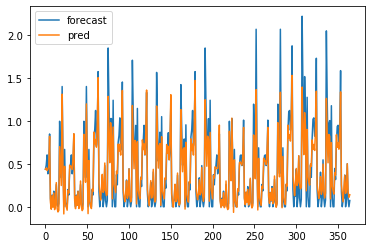

In [237]:
test_dt[['forecast', 'pred']][0:365].plot()

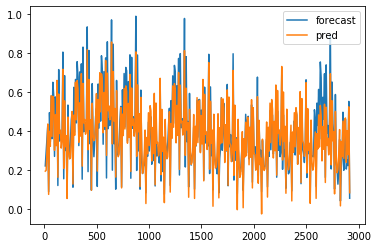

In [238]:
test_dt[['forecast', 'pred']].rolling(8).mean()[3::8][0:365].plot()

In [166]:
dt_test = pd.DataFrame(X_test, columns=train_dt.columns)
dt_test['forecast'] = preds
dt_test['target'] = list(y_test)
dt_test

ValueError: Shape of passed values is (20296, 655), indices imply (20296, 656)

In [ ]:
months = []
for i, row in tqdm(dt_test.iterrows()):
    for i in range(1, 13):
        if row['month_{}'.format(i)] == 1:
            months.append(i)
            break
dt_test['month'] = months

In [ ]:
dt_test[dt_test['Сом'] == 1][['forecast', 'month', 'target']].groupby(['month']).mean()

In [ ]:
dt_test.sort_values(['day', 'month'])[['day', 'month']][:365]